In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
from scipy.stats import ttest_rel, ttest_ind

import warnings
warnings.filterwarnings("ignore")

grid_search_dir = '.'
datadir = '.'

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "211025_INTERACTIONS_BASELINE_PATIENT_10xvisium",
        "211025b_INTERACTIONS_PATIENT_10xvisium",
        "211025c_INTERACTIONS_PATIENT_10xvisium",
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

211025_INTERACTIONS_BASELINE_PATIENT_10xvisium: loaded 1 runs with 3-fold cross validation
211025b_INTERACTIONS_PATIENT_10xvisium: loaded 11 runs with 3-fold cross validation
211025c_INTERACTIONS_PATIENT_10xvisium: loaded 1 runs with 3-fold cross validation


211025_interactions_baseline_patient_10xvisium_adam_lr1_bsS_md0_ri0_n10_fsstandard_l21_l11
211025c_interactions_patient_10xvisium_adam_lr1_bsS_md0_ri0_n10_fsstandard_l21_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211025b_interactions_patient_10xvisium_adam_lr1_bsS_md0_ri1_n10_fsstandard_l21_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211025b_interactions_patient_10xvisium_adam_lr1_bsS_md0_ri2_n10_fsstandard_l21_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211025b_interactions_patient_10xvisium_adam_lr1_bsS_md0_ri3_n10_fsstandard_l21_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211025b_interactions_patient_10xvisium_adam_lr1_bsS_md0_ri4_n10_fsstandard_l21_l1

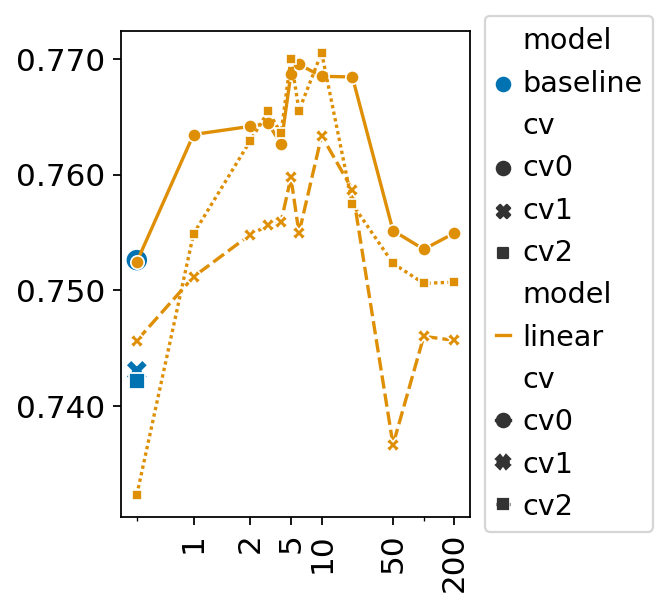

In [4]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_PATIENT": "linear",
            "INTERACTIONS_BASELINE_PATIENT": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[ 1,  2,  5, 10,  50,  200],
)

In [5]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_PATIENT")],
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_PATIENT")],
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=5.894398414196026, pvalue=0.027596151329828938)


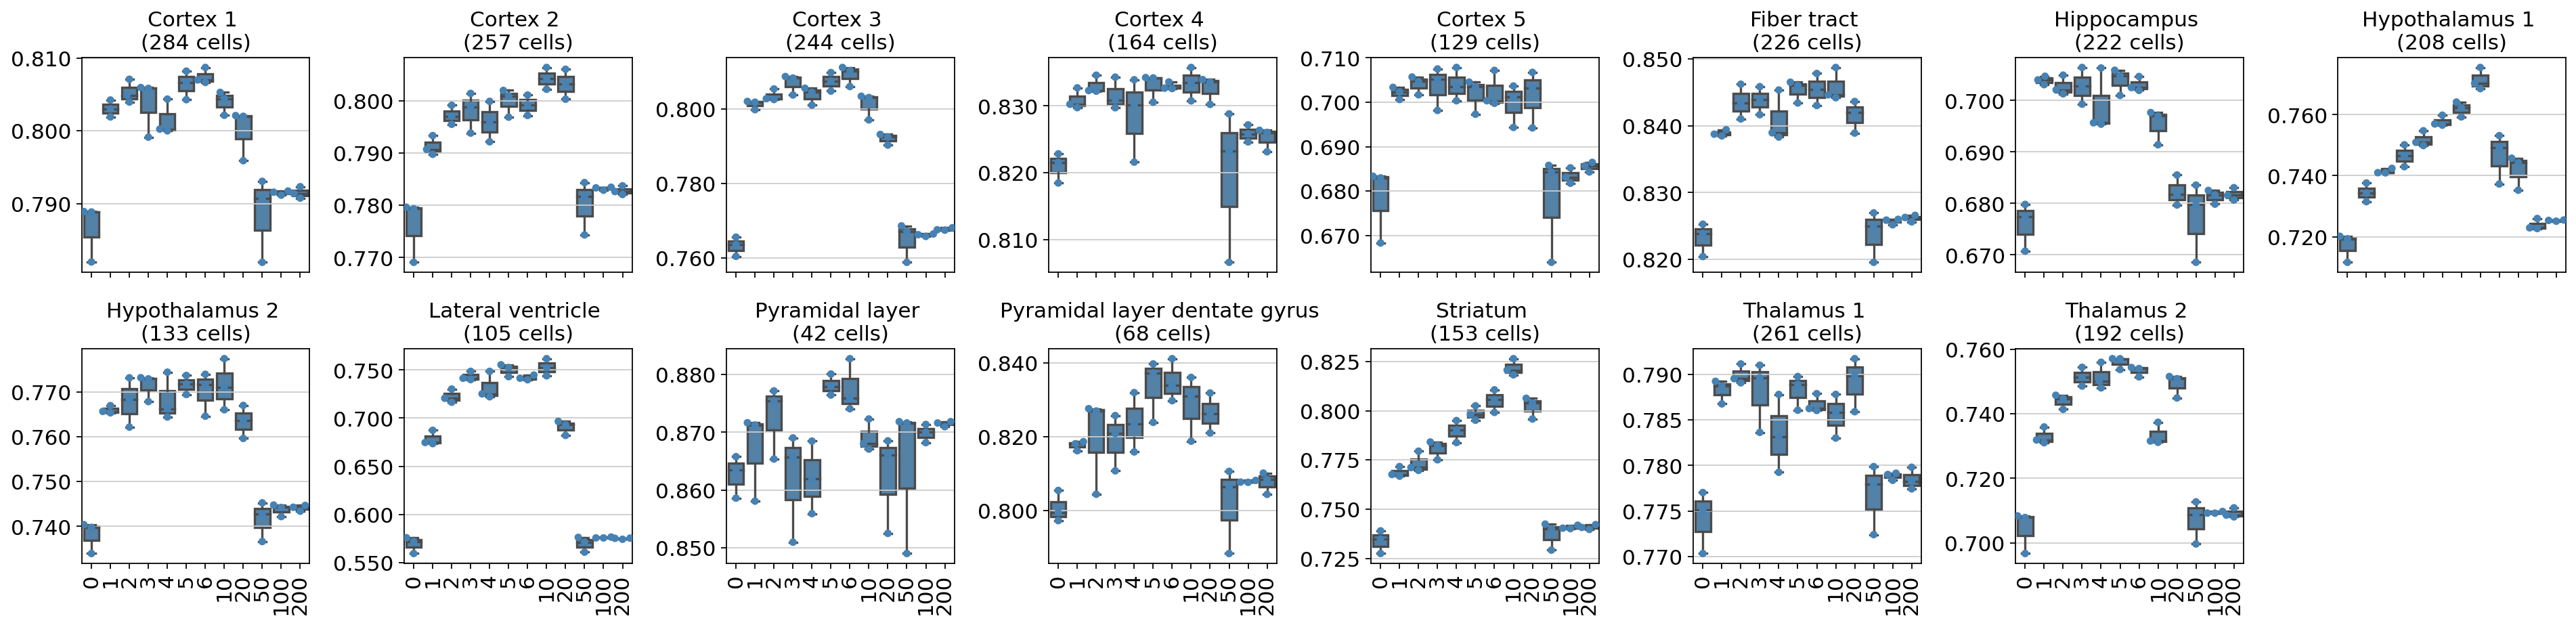

In [6]:
gs_linear.load_target_cell_evaluation()
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="n_rings",
)